### Importing all the required libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [22]:
#loading the dataset into a dataframe
df = pd.read_csv("../data/processed/feature_engineered_data_updated.csv")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Is_Weekend,Rolling_mean_1h,Rolling_std_1h,Total_sub_metering,Unmetered_power
0,5.360,0.436,233.63,0.0,1.0,16.0,17,5,1,4.788000,0.808930,17.0,72.333333
1,5.374,0.498,233.29,0.0,2.0,17.0,17,5,1,4.983333,0.664567,19.0,70.566667
2,5.388,0.502,233.74,0.0,1.0,17.0,17,5,1,5.084500,0.579113,18.0,71.800000
3,3.666,0.528,235.68,0.0,1.0,17.0,17,5,1,4.800800,0.808676,18.0,43.100000
4,3.520,0.522,235.02,0.0,2.0,17.0,17,5,1,4.587333,0.892510,19.0,39.666667


### Splitting the data before scaling the data

In [23]:
X = df.drop(['Global_active_power', 'Total_sub_metering', 'Unmetered_power'], axis=1)
y = df['Global_active_power']


### Splitting the data into training and testing data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [25]:
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#check if data is scaled
X_train_scaled_df =  pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df


,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Is_Weekend,Rolling_mean_1h,Rolling_std_1h
0,-0.268321,-1.076590,-0.184147,-0.225297,1.295573,-0.216767,-0.497371,-0.628954,0.348339,-0.543929
1,-0.411417,0.011257,-0.184147,-0.225297,1.415578,-1.661157,-0.998072,-0.628954,-0.564570,-0.005416
2,2.432610,0.375898,-0.024915,0.108441,-0.624508,0.938745,1.505434,1.589941,1.485279,1.235753
3,-1.091121,0.363743,0.134316,-0.225297,1.415578,-0.505645,1.004733,1.589941,0.594540,-0.099290
4,-0.608173,1.655182,-0.184147,-0.225297,-0.744513,-0.794523,0.003330,-0.628954,-0.395692,0.396998
...,...,...,...,...,...,...,...,...,...,...
1258627,-0.286208,-0.748413,-0.184147,-0.225297,-0.744513,-0.650084,1.505434,1.589941,-1.006453,-0.857462
1258628,-0.089451,-0.298688,-0.184147,-0.225297,1.415578,0.938745,1.505434,1.589941,-0.127752,0.501741
1258629,-0.107338,0.126727,4.752035,-0.225297,-0.744513,-0.505645,1.505434,1.589941,2.446335,2.643807
1258630,2.200079,-1.061397,-0.184147,-0.225297,1.415578,0.216550,1.004733,1.589941,0.876566,-0.414241


### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# 4. Make predictions
y_pred = lr.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression -> MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Linear Regression -> MSE: 0.2055, MAE: 0.2862, R2: 0.8272


### Random forest

In [29]:
# 1. Create model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# 2. Train model
rf.fit(X_train, y_train)

# 3. Predict
y_pred_rf = rf.predict(X_test)

# 4. Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R2: {r2_rf:.4f}")

Random Forest -> MSE: 0.1384, MAE: 0.2052, R2: 0.8837


### Gradient Boosting

In [30]:
# 1. Create model
gbr = GradientBoostingRegressor(
    n_estimators=100,    # number of boosting stages
    learning_rate=0.1,   # step size for each iteration
    max_depth=3,         # max depth of each tree
    random_state=42
)

# 2. Train model
gbr.fit(X_train, y_train)

# 3. Predict
y_pred_gbr = gbr.predict(X_test)

# 4. Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting -> MSE: {mse_gbr:.4f}, MAE: {mae_gbr:.4f}, R2: {r2_gbr:.4f}")

Gradient Boosting -> MSE: 0.1508, MAE: 0.2230, R2: 0.8732


### Neural network


In [31]:
# 1. Create model
nn = MLPRegressor(
    hidden_layer_sizes=(64, 64),  # 2 hidden layers with 64 neurons each
    activation='relu',             # common choice
    alpha=0.001,                   # L2 regularization to reduce overfitting
    max_iter=500,                  # max training iterations
    random_state=42
)

# 2. Train model
nn.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_nn = nn.predict(X_test_scaled)

# 4. Evaluate
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network -> MSE: {mse_nn:.4f}, MAE: {mae_nn:.4f}, R2: {r2_nn:.4f}")

Neural Network -> MSE: 0.1127, MAE: 0.1805, R2: 0.9052


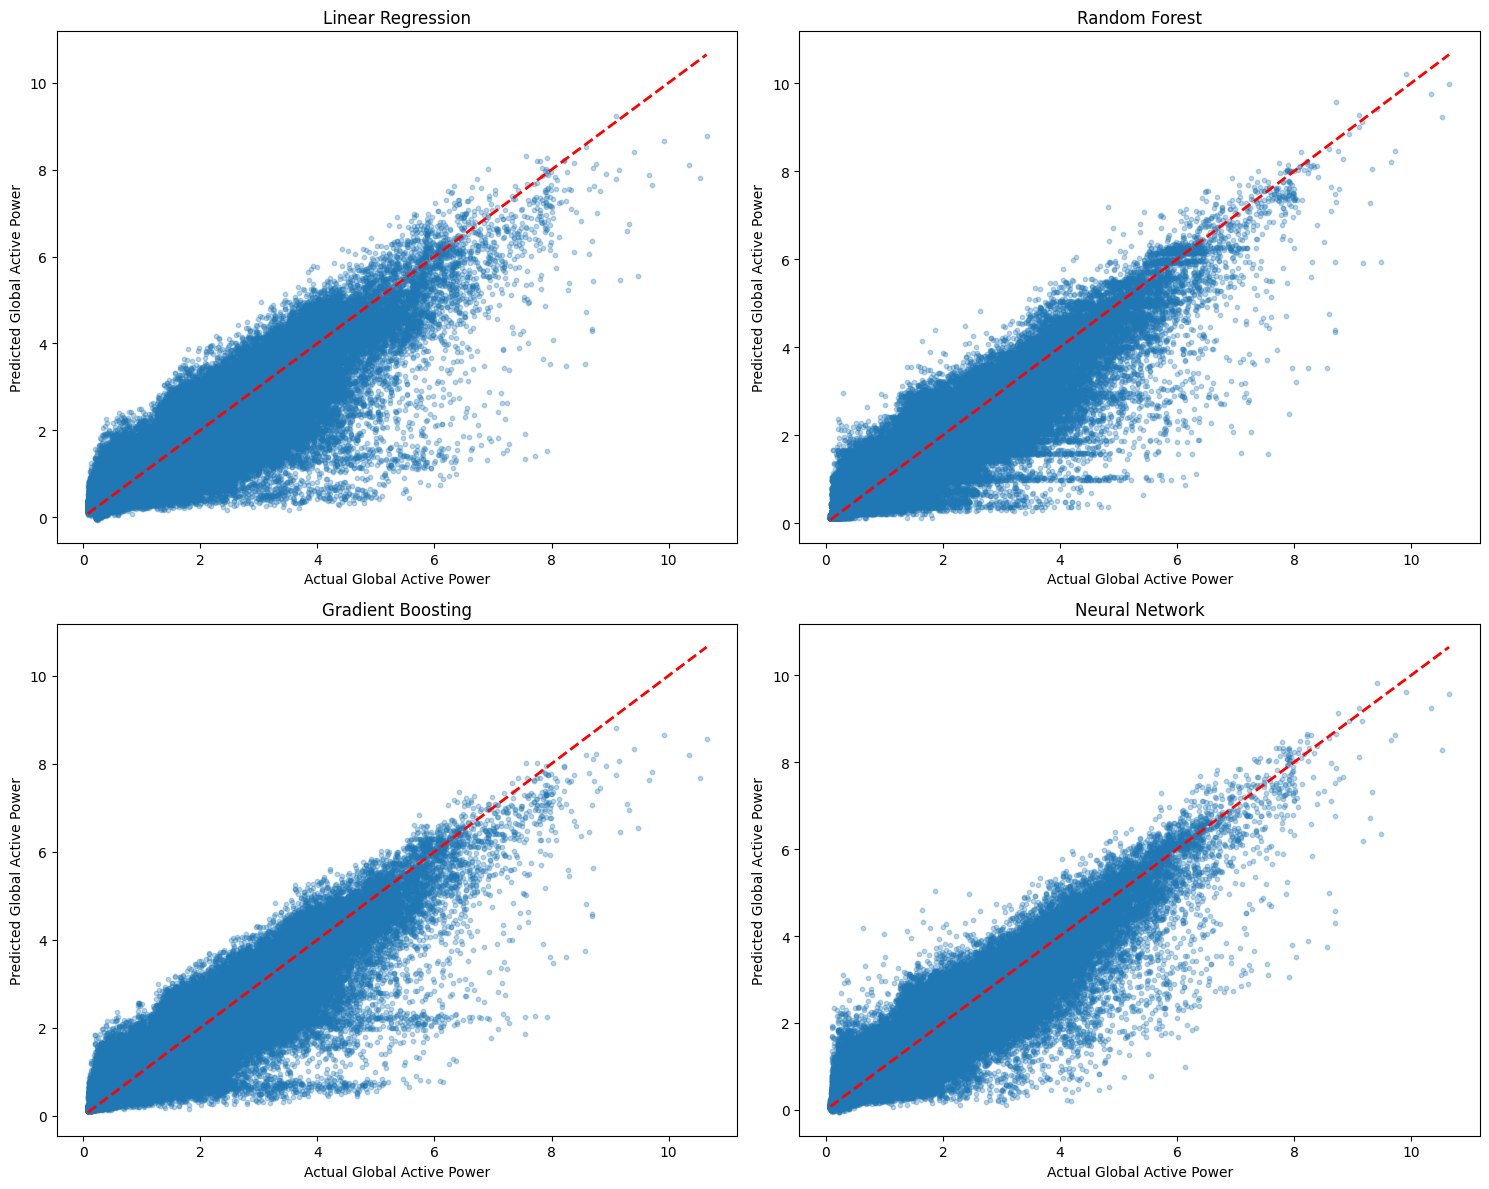

In [32]:

# Create predictions
y_pred_lr = lr.predict(X_test)                 # Linear Regression
y_pred_rf = rf.predict(X_test)                 # Random Forest
y_pred_gbr = gbr.predict(X_test)               # Gradient Boosting
y_pred_nn = nn.predict(X_test_scaled)          # Neural Network (scaled features)

# Plotting
plt.figure(figsize=(15,12))

models_preds = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gbr,
    'Neural Network': y_pred_nn
}

for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    plt.subplot(2,2,i)
    plt.scatter(y_test, y_pred, alpha=0.3, s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(name)
    plt.xlabel('Actual Global Active Power')
    plt.ylabel('Predicted Global Active Power')

plt.tight_layout()
plt.show()


### Best model -> Neural Network